In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

'''Defining our parths and bringing everything here.'''
base_path = '/content/drive/My Drive/CV-A2-calibration/'
images_dir = os.path.join(base_path, 'camera_images')
lidar_dir = os.path.join(base_path, 'lidar_scans')
params_dir = os.path.join(base_path, 'camera_parameters')

'''
We write the code to display the images from the image directory.
'''
def display_images(images_dir):
    image_files = os.listdir(images_dir) # Access the directory
    for img_file in image_files: # for each file in the directory
        img_path = os.path.join(images_dir, img_file) # get the image path
        img = Image.open(img_path) # using the path of the image open the image
        plt.imshow(img) # show the image using matplotlib
        plt.axis('off')
        plt.title(img_file)
        plt.show()

# Function to read lidar scans
def read_lidar_scans(lidar_dir):
    lidar_files = os.listdir(lidar_dir) # Access the directory
    for lidar_file in lidar_files:
        with open(os.path.join(lidar_dir, lidar_file), 'rb') as f:  # Open in binary mode
            lidar_data = f.read()
            print(f"Lidar scan file: {lidar_file}")
            print(lidar_data)

# Function to read camera parameters
def read_camera_parameters(params_dir):
    # Filter out subdirectories. Since there are directories within the directory.
    params_files = [file for file in os.listdir(params_dir) if os.path.isfile(os.path.join(params_dir, file))]

    # Iterate over files
    for params_file in params_files:
        with open(os.path.join(params_dir, params_file), 'rb') as f:  # Open in binary mode
            params_data = f.read()
            print(f"Camera parameters file: {params_file}")
            print(params_data)

In [ ]:
print("Displaying images:")
display_images(images_dir)

In [ ]:
# Read lidar scans
print("\nReading lidar scans:")
read_lidar_scans(lidar_dir)
'''It does not print anything informative because we are reading the file in binary mode.'''

In [5]:
# Read camera parameters
print("\nReading camera parameters:")
read_camera_parameters(params_dir)


Reading camera parameters:
Camera parameters file: camera_intrinsic.txt
b'6.353664855742439386e+02 0.000000000000000000e+00 6.433965876009681324e+02\n0.000000000000000000e+00 6.261901730718112731e+02 3.880747880982142988e+02\n0.000000000000000000e+00 0.000000000000000000e+00 1.000000000000000000e+00\n'
Camera parameters file: distortion.txt
b'-8.680180305386757389e-02 1.156287377058448779e-01 7.226010587794677240e-03 -2.233537197226079284e-04 -5.891062411595048703e-02\n'
Camera parameters file: .DS_Store
b'\x00\x00\x00\x01Bud1\x00\x00\x10\x00\x00\x00\x08\x00\x00\x00\x10\x00\x00\x00\x02\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x01\x00\x00\x10\x00\x00r\x00a\x00_\x00i\x00n\x00t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [4]:
!pip install pyntcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.3/346.3 kB 6.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/numba.py:5: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_count(xyz, indices, out):
/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/numba.py:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_sum(xyz, indices, N, out):
/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/nu

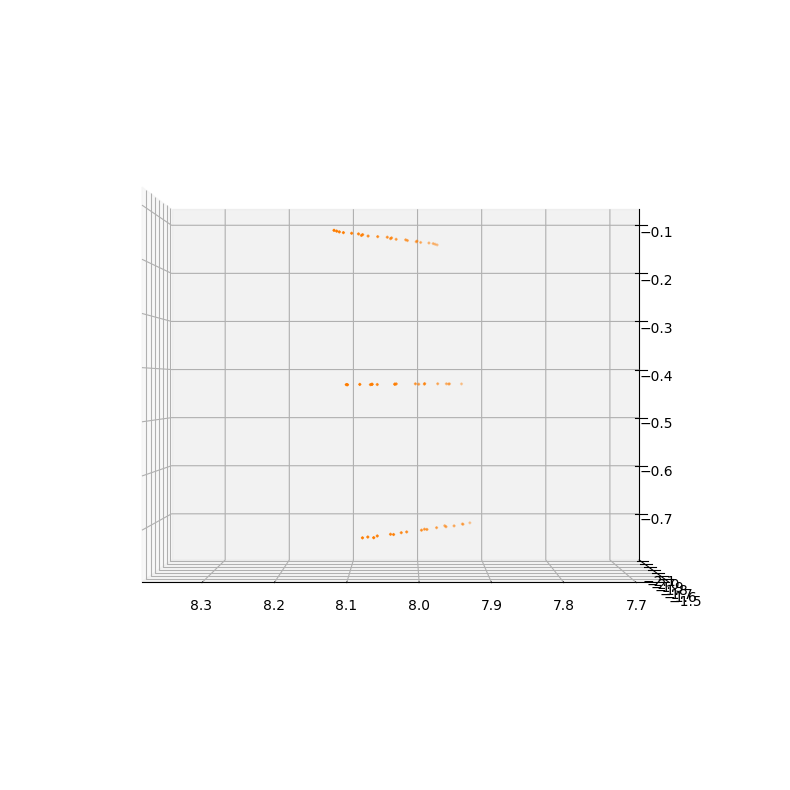

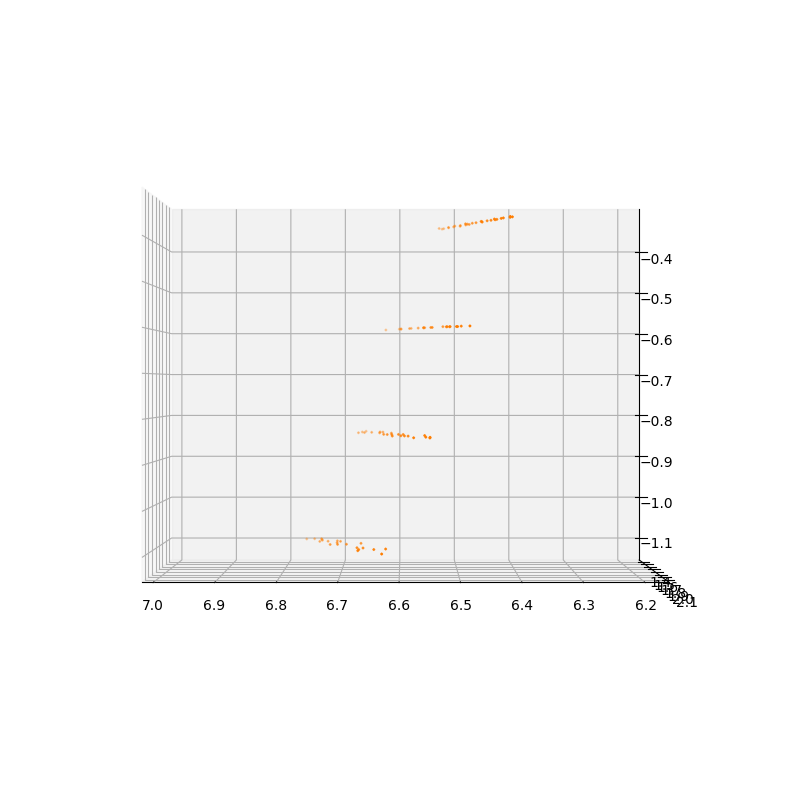

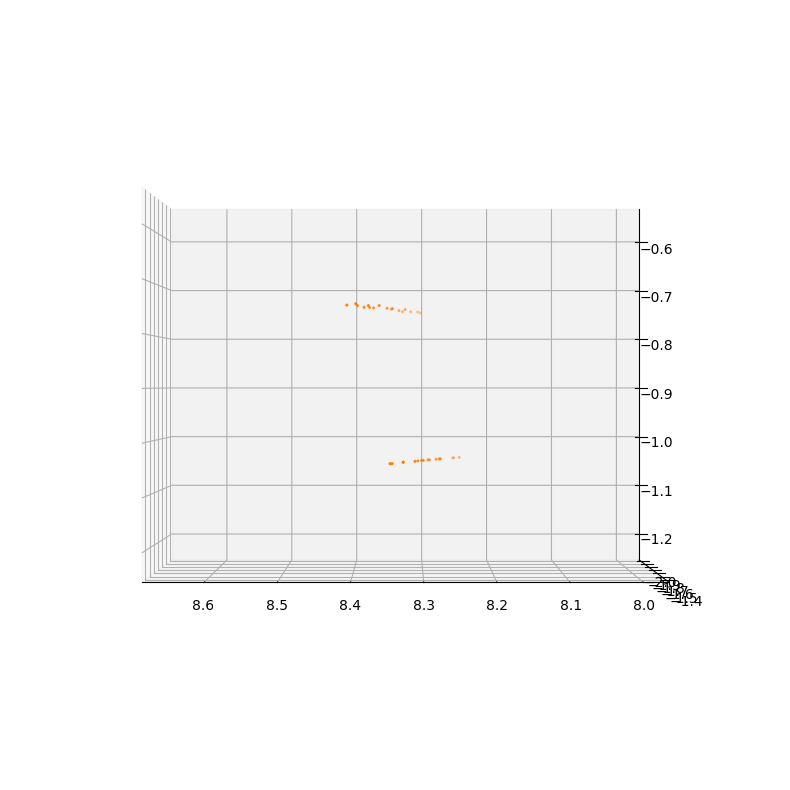

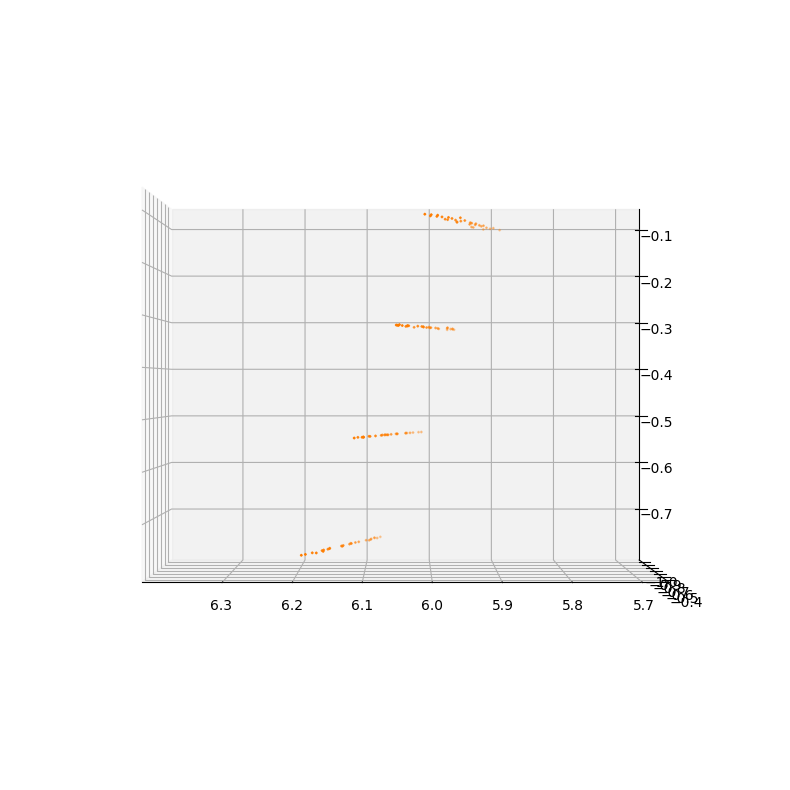

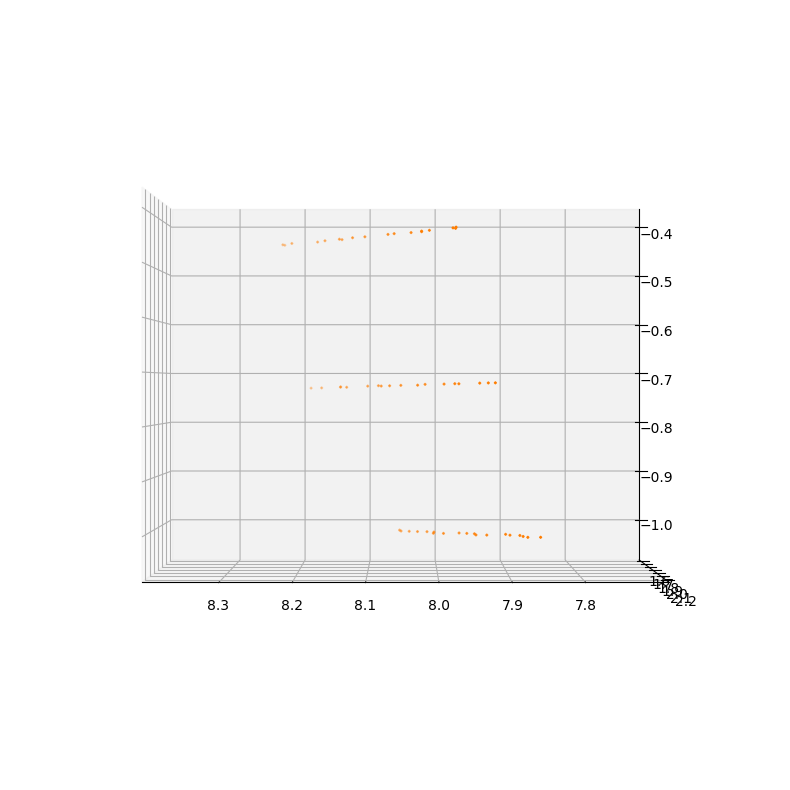

In [7]:
from pyntcloud import PyntCloud
import os

# Define the directory containing the LIDAR scans
lidar_scans_dir = '/content/drive/My Drive/CV-A2-calibration/lidar_scans'

num_files_to_display = 5 # Define the number of files you want to display

lidar_files = os.listdir(lidar_scans_dir) # Get list of files in the directory

# Iterate and display the LIDAR point clouds
for lidar_file in lidar_files[:num_files_to_display]:
    lidar_scan_path = os.path.join(lidar_scans_dir, lidar_file) # get the full path to the LIDAR scan file

    lidar_cloud = PyntCloud.from_file(lidar_scan_path)# Load LIDAR scan

    # Plot the point cloud
    lidar_cloud.plot()


# 1 = Computing plane normals

In [5]:
import os
from pyntcloud import PyntCloud
import numpy as np

def compute_plane_normals_offsets(lidar_dir, num_scans):
    plane_normals = [] # to store the plane normals
    offsets = [] # to store the point offsets.

    lidar_files = os.listdir(lidar_dir)# Get list of files in the directory

    for lidar_file in lidar_files[:num_scans]:# Iterate over a specified number of scans

        lidar_scan_path = os.path.join(lidar_dir, lidar_file) # get the full path to the LIDAR scan file

        lidar_cloud = PyntCloud.from_file(lidar_scan_path) # store LIDAR scan

        planar_points = lidar_cloud.points # Get planar points

        # Apply Singular Value Decomposition (SVD)
        _, _, vh = np.linalg.svd(planar_points, full_matrices=False)

        # Plane normal is the last row of vh
        plane_normal = vh[-1]
        plane_normals.append(plane_normal)

        # Compute offset d from the origin to the plane
        offset = -np.dot(plane_normal, planar_points.mean(axis=0))
        offsets.append(offset)

    return plane_normals, offsets

# Define the directory containing the LIDAR scans
lidar_scans_dir = '/content/drive/My Drive/CV-A2-calibration/lidar_scans'

# Define the number of scans to iterate over
num_scans = 25

# Compute plane normals and offsets
plane_normals, offsets = compute_plane_normals_offsets(lidar_scans_dir, num_scans)

# Display results
for i, (normal, offset) in enumerate(zip(plane_normals, offsets), 1):
    print(f"Plane {i}: Normal = {normal}, Offset = {offset}")

/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/numba.py:5: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_count(xyz, indices, out):
/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/numba.py:12: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def groupby_sum(xyz, indices, N, out):
/usr/local/lib/python3.10/dist-packages/pyntcloud/utils/nu

Plane 1: Normal = [ 0.21290252  0.97660804 -0.03015424], Offset = 0.00019648578017950058
Plane 2: Normal = [-0.27013198  0.9362082  -0.22481766], Offset = 0.000760495662689209
Plane 3: Normal = [ 0.09349882 -0.06432354  0.99353933], Offset = 0.00025666505098342896
Plane 4: Normal = [0.11655805 0.993106   0.01243492], Offset = 0.00023660948500037193
Plane 5: Normal = [ 0.18587807 -0.90856564 -0.37410933], Offset = 0.0005525946617126465
Plane 6: Normal = [0.4484332  0.48426893 0.7512598 ], Offset = -0.0026053190231323242
Plane 7: Normal = [ 0.28584704  0.9416206  -0.17788222], Offset = -0.0017397254705429077
Plane 8: Normal = [0.17063239 0.22785623 0.9586272 ], Offset = 0.0016198158264160156
Plane 9: Normal = [ 0.07732306  0.34425956 -0.93568504], Offset = 0.002199530601501465
Plane 10: Normal = [ 0.24815519  0.9415081  -0.22799441], Offset = -0.0011558085680007935
Plane 11: Normal = [-0.23084207 -0.9729858   0.00324548], Offset = 0.00011933152563869953
Plane 12: Normal = [-0.13441342 -0

# First we will store the data together

In [6]:
import os
import pandas as pd
from pyntcloud import PyntCloud
import numpy as np

def compute_plane_normals_offsets(lidar_dir):
    data = []

    # Get list of files in the directory
    lidar_files = os.listdir(lidar_dir)

    # Iterate over all lidar files
    for lidar_file in lidar_files:
        # Construct the full path to the LIDAR scan file
        lidar_scan_path = os.path.join(lidar_dir, lidar_file)

        # Load LIDAR scan
        lidar_cloud = PyntCloud.from_file(lidar_scan_path)

        # Get planar points
        planar_points = lidar_cloud.points

        # Apply Singular Value Decomposition (SVD)
        _, _, vh = np.linalg.svd(planar_points, full_matrices=False)

        # Plane normal is the last row of vh
        plane_normal = vh[-1]

        # Compute offset d from the origin to the plane
        offset = -np.dot(plane_normal, planar_points.mean(axis=0))

        # Append data to the list
        data.append({'File_Name': lidar_file, 'Plane_Normal': plane_normal, 'Offset': offset})

    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)

    return df

# Define the directory containing the LIDAR scans
lidar_scans_dir = '/content/drive/My Drive/CV-A2-calibration/lidar_scans'

# Compute plane normals, offsets, and create DataFrame
lidar_data = compute_plane_normals_offsets(lidar_scans_dir)

# Display DataFrame
print(lidar_data)

         File_Name                              Plane_Normal    Offset
0   frame_1798.pcd    [0.21290252, 0.97660804, -0.030154243]  0.000196
1   frame_1195.pcd     [-0.27013198, 0.9362082, -0.22481766]  0.000760
2    frame_639.pcd     [0.09349882, -0.06432354, 0.99353933]  0.000257
3   frame_1473.pcd       [0.11655805, 0.993106, 0.012434917]  0.000237
4    frame_256.pcd    [0.18587807, -0.90856564, -0.37410933]  0.000553
5   frame_1580.pcd        [0.4484332, 0.48426893, 0.7512598] -0.002605
6   frame_2725.pcd      [0.28584704, 0.9416206, -0.17788222] -0.001740
7    frame_548.pcd       [0.17063239, 0.22785623, 0.9586272]  0.001620
8    frame_795.pcd     [0.07732306, 0.34425956, -0.93568504]  0.002200
9   frame_2717.pcd      [0.24815519, 0.9415081, -0.22799441] -0.001156
10  frame_2962.pcd   [-0.23084207, -0.9729858, 0.0032454787]  0.000119
11  frame_2800.pcd  [-0.13441342, -0.044138063, -0.98994184]  0.000370
12   frame_607.pcd     [-0.22794697, -0.971483, -0.06527653]  0.000408
13  fr

In [7]:
import os
import pandas as pd

def read_camera_parameters(params_dir, image_name):
    # Initialize an empty dictionary to store data for each file
    file_data = {}

    # Iterate through each file in the directory
    for file_name in ['camera_normals.txt', 'rotation_matrix.txt', 'rotation_vectors.txt', 'translation_vectors.txt']:
        # Construct the full path to the file
        file_path = os.path.join(params_dir, image_name, file_name)

        # Read data from the file
        with open(file_path, 'r') as f:
            data = f.read()

        # Add the data to the dictionary
        file_data[file_name] = data

    return file_data

# Define the directory containing the camera parameters
camera_params_dir = '/content/drive/My Drive/CV-A2-calibration/camera_parameters/Images'

# Initialize an empty list to store DataFrame for each image
dfs = []

# Iterate over each directory (image directory) in the camera parameters directory
for image_dir in os.listdir(camera_params_dir):
    # Construct the full path to the image directory
    image_dir_path = os.path.join(camera_params_dir, image_dir)

    # Ignore .DS_Store file
    if image_dir == '.DS_Store':
        continue

    # Read camera parameters for this image
    image_camera_params = read_camera_parameters(camera_params_dir, image_dir)

    # Create a DataFrame for this image's parameters
    image_df = pd.DataFrame(image_camera_params, index=[0])

    # Add a column for the image file name
    image_df['File_Name'] = image_dir

    # Reorder the columns
    image_df = image_df[['File_Name', 'camera_normals.txt', 'rotation_matrix.txt', 'rotation_vectors.txt', 'translation_vectors.txt']]

    # Append the DataFrame to the list of DataFrames
    dfs.append(image_df)

# Concatenate all DataFrames into a single DataFrame
cam_param = pd.concat(dfs, ignore_index=True)

# Display DataFrame containing camera parameters
print(cam_param)

          File_Name                                 camera_normals.txt  \
0   frame_2030.jpeg  2.900134847462618737e-01\n2.862724751311893079...   
1   frame_1061.jpeg  -6.437172128404278215e-01\n7.55161914890896124...   
2   frame_1558.jpeg  -6.547740051525706706e-01\n1.64821998675040826...   
3   frame_2800.jpeg  -4.561339107855932884e-01\n-5.5496293373047123...   
4   frame_1580.jpeg  -4.240294083103121059e-01\n3.19242013016417858...   
5    frame_548.jpeg  5.202592686382215281e-02\n-5.37732359792403857...   
6   frame_1850.jpeg  -1.391732252668594905e-01\n-2.9359119850292170...   
7    frame_457.jpeg  6.108998056402371174e-02\n-7.90080649515775002...   
8   frame_1153.jpeg  -4.000883470314932078e-01\n6.87634262164085741...   
9   frame_2991.jpeg  -7.042243243496566496e-01\n7.30510851064131716...   
10  frame_2725.jpeg  3.912652470995692244e-01\n-2.34025619738104429...   
11   frame_339.jpeg  4.040383148698529769e-01\n-3.96753774407465620...   
12  frame_1430.jpeg  -6.91326814015113

In [8]:
cam_param.head(5)

,File_Name,camera_normals.txt,rotation_matrix.txt,rotation_vectors.txt,translation_vectors.txt
0,frame_2030.jpeg,2.900134847462618737e-01\n2.862724751311893079...,1.246066830557487903e-01 9.488758365577519838e...,4.598552746618537745e-01\n-2.25964014356993953...,-2.278822068440343962e+00\n3.50741097385789735...
1,frame_1061.jpeg,-6.437172128404278215e-01\n7.55161914890896124...,-4.698817358312193382e-02 7.638195215077145939...,-4.930523370029950003e-01\n6.08089532164045043...,2.163255362481327992e+00\n9.380138213328795826...
2,frame_1558.jpeg,-6.547740051525706706e-01\n1.64821998675040826...,1.977427958573965139e-01 -7.294989985345841088...,6.477965146764339543e-01\n4.723360407835545671...,2.740629231499585039e+00\n-1.01264747183164097...
3,frame_2800.jpeg,-4.561339107855932884e-01\n-5.5496293373047123...,1.208345708464032275e-01 -8.816693608829818674...,3.341841298878802102e-01\n3.932504443957399731...,3.127684525645429314e+00\n-1.59148591712396397...
4,frame_1580.jpeg,-4.240294083103121059e-01\n3.19242013016417858...,-6.830017970840267238e-02 9.030692921032175136...,-8.479805257501978055e-02\n6.13698859900280502...,2.421949586019891854e+00\n5.192807841494255783...


# reading the camera intrinsic parameters and distortion coefficients

In [23]:
import numpy as np

# Read the contents of camera intrinsic parameters file and store in a numpy array
with open('/content/drive/My Drive/CV-A2-calibration/camera_parameters/camera_intrinsic.txt', 'r') as file:
    camera_intrinsic_lines = file.readlines()

# Convert each line to a numpy array of floats
camera_intrinsic_data = np.array([list(map(float, line.strip().split())) for line in camera_intrinsic_lines])

print("Camera Intrinsic Parameters:")
print(camera_intrinsic_data)

# Read the contents of distortion coefficients file and store in a numpy array
with open('/content/drive/My Drive/CV-A2-calibration/camera_parameters/distortion.txt', 'r') as file:
    distortion_lines = file.readlines()

# Convert each line to a numpy array of floats
distortion_coefficients_data = np.array([list(map(float, line.strip().split())) for line in distortion_lines])

print("Distortion Coefficients:")
print(distortion_coefficients_data)

Camera Intrinsic Parameters:
[[635.36648557   0.         643.3965876 ]
 [  0.         626.19017307 388.0747881 ]
 [  0.           0.           1.        ]]
Distortion Coefficients:
[[-0.0868018   0.11562874  0.00722601 -0.00022335 -0.05891062]]


In [24]:
# Modify the 'File_Name' column in cam_param and lidar_data to create a common identifier
cam_param['Common_ID'] = cam_param['File_Name'].str.split('.').str[0]  # Extracts the file name without extension
lidar_data['Common_ID'] = lidar_data['File_Name'].str.split('.').str[0]  # Extracts the file name without extension

# Merge the cam_param and lidar_data DataFrames on the 'Common_ID' column
data = pd.merge(cam_param, lidar_data, on='Common_ID')

# Drop the 'Common_ID' column as it's no longer needed
data.drop(columns='Common_ID', inplace=True)

In [26]:
data.head(5)

,File_Name_x,camera_normals.txt,rotation_matrix.txt,rotation_vectors.txt,translation_vectors.txt,File_Name_y,Plane_Normal,Offset
0,frame_2030.jpeg,2.900134847462618737e-01\n2.862724751311893079...,1.246066830557487903e-01 9.488758365577519838e...,4.598552746618537745e-01\n-2.25964014356993953...,-2.278822068440343962e+00\n3.50741097385789735...,frame_2030.pcd,"[-0.034497, 0.9982623, 0.04777433]",-0.000445
1,frame_1061.jpeg,-6.437172128404278215e-01\n7.55161914890896124...,-4.698817358312193382e-02 7.638195215077145939...,-4.930523370029950003e-01\n6.08089532164045043...,2.163255362481327992e+00\n9.380138213328795826...,frame_1061.pcd,"[0.0018904286, -0.2047629, 0.9788098]",-0.003598
2,frame_1558.jpeg,-6.547740051525706706e-01\n1.64821998675040826...,1.977427958573965139e-01 -7.294989985345841088...,6.477965146764339543e-01\n4.723360407835545671...,2.740629231499585039e+00\n-1.01264747183164097...,frame_1558.pcd,"[0.06274707, -0.0913969, 0.9938357]",-0.002614
3,frame_2800.jpeg,-4.561339107855932884e-01\n-5.5496293373047123...,1.208345708464032275e-01 -8.816693608829818674...,3.341841298878802102e-01\n3.932504443957399731...,3.127684525645429314e+00\n-1.59148591712396397...,frame_2800.pcd,"[-0.13441342, -0.044138063, -0.98994184]",0.000370
4,frame_1580.jpeg,-4.240294083103121059e-01\n3.19242013016417858...,-6.830017970840267238e-02 9.030692921032175136...,-8.479805257501978055e-02\n6.13698859900280502...,2.421949586019891854e+00\n5.192807841494255783...,frame_1580.pcd,"[0.4484332, 0.48426893, 0.7512598]",-0.002605
